In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.0 MB/s eta 0:00:00


Thời gian nấu đề xuất (phút): 26.666666666666657
Công suất đề xuất (0..10):    8.95


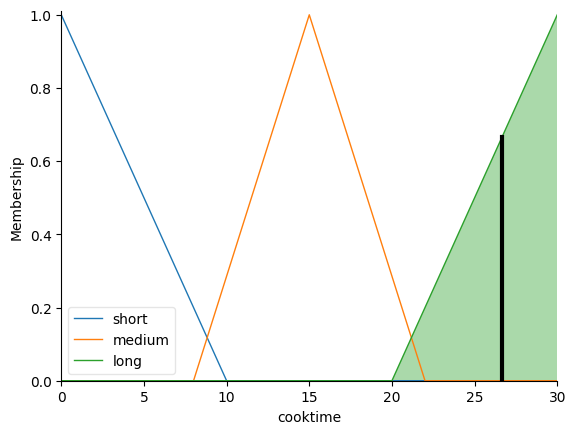

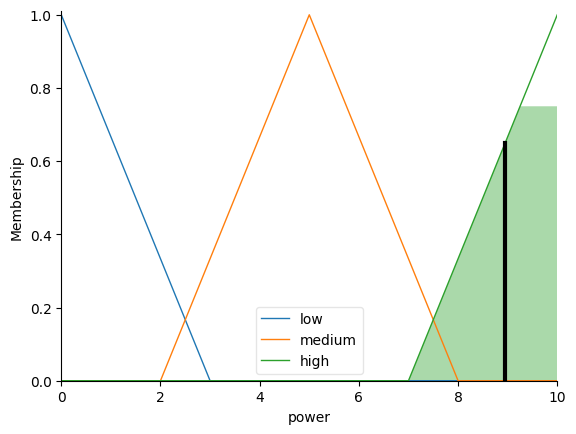

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

weight   = ctrl.Antecedent(np.arange(0, 11, 1), 'weight')
foodtype = ctrl.Antecedent(np.arange(0, 11, 1), 'foodtype')
inittemp = ctrl.Antecedent(np.arange(0, 61, 1), 'inittemp')

cooktime = ctrl.Consequent(np.arange(0, 31, 1), 'cooktime')
power    = ctrl.Consequent(np.arange(0, 11, 1), 'power')

weight['light']  = fuzz.trimf(weight.universe, [0, 0, 4])
weight['medium'] = fuzz.trimf(weight.universe, [3, 5, 7])
weight['heavy']  = fuzz.trimf(weight.universe, [6, 10, 10])

foodtype['soft']   = fuzz.trimf(foodtype.universe, [0, 0, 4])
foodtype['medium'] = fuzz.trimf(foodtype.universe, [3, 5, 7])
foodtype['hard']   = fuzz.trimf(foodtype.universe, [6, 10, 10])

inittemp['cold'] = fuzz.trapmf(inittemp.universe, [0, 0, 15, 20])
inittemp['warm'] = fuzz.trimf(inittemp.universe, [15, 25, 35])
inittemp['hot']  = fuzz.trapmf(inittemp.universe, [30, 40, 60, 60])

cooktime['short']  = fuzz.trimf(cooktime.universe, [0, 0, 10])
cooktime['medium'] = fuzz.trimf(cooktime.universe, [8, 15, 22])
cooktime['long']   = fuzz.trimf(cooktime.universe, [20, 30, 30])

power['low']    = fuzz.trimf(power.universe, [0, 0, 3])
power['medium'] = fuzz.trimf(power.universe, [2, 5, 8])
power['high']   = fuzz.trimf(power.universe, [7, 10, 10])

rule1 = ctrl.Rule(weight['light'], cooktime['short'])
rule2 = ctrl.Rule(weight['medium'], cooktime['medium'])
rule3 = ctrl.Rule(weight['heavy'], cooktime['long'])

rule4 = ctrl.Rule(foodtype['soft'], power['low'])
rule5 = ctrl.Rule(foodtype['medium'], power['medium'])
rule6 = ctrl.Rule(foodtype['hard'], power['high'])

rule7 = ctrl.Rule(inittemp['cold'], cooktime['long'])
rule8 = ctrl.Rule(inittemp['warm'], cooktime['medium'])
rule9 = ctrl.Rule(inittemp['hot'],  cooktime['short'])

rule10 = ctrl.Rule(weight['heavy'] & foodtype['hard'] & inittemp['cold'],
                   (cooktime['long'], power['high']))

all_rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10]

microwave_ctrl = ctrl.ControlSystem(all_rules)
microwave_sim  = ctrl.ControlSystemSimulation(microwave_ctrl)

microwave_sim.input['weight']   = 8
microwave_sim.input['foodtype'] = 9
microwave_sim.input['inittemp'] = 5

microwave_sim.compute()

print("Thời gian nấu đề xuất (phút):", microwave_sim.output['cooktime'])
print("Công suất đề xuất (0..10):   ", microwave_sim.output['power'])

cooktime.view(sim=microwave_sim)
power.view(sim=microwave_sim)
